In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import glob
import os

from nilearn import image
from nilearn import plotting
from nilearn import datasets
from nilearn.connectome import ConnectivityMeasure
from nilearn.maskers import MultiNiftiLabelsMasker
from nilearn.maskers import MultiNiftiMasker


path = 'data/'

In [18]:

imgs_paths = glob.glob(path + 'prep_000*.nii')
print(imgs_paths)
schaefer = datasets.fetch_atlas_schaefer_2018(n_rois = 400)
connectome_measure = ConnectivityMeasure(kind = 'correlation')
masker = MultiNiftiLabelsMasker(labels_img = schaefer['maps'], standardize= True, memory='nilearn_cache', n_jobs = -1)
time_series = masker.fit_transform(imgs_paths)

SyntaxError: invalid decimal literal (2398399719.py, line 5)

In [10]:
correlation_matrices = connectome_measure.fit_transform(time_series)

In [12]:
mean_ = connectome_measure.mean_
coords = plotting.find_parcellation_cut_coords(labels_img = schaefer['maps'])


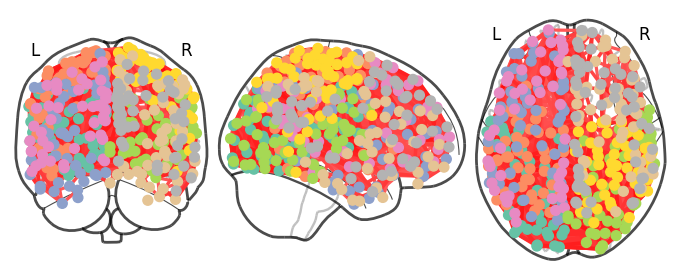

In [13]:
plotting.plot_connectome(mean_, coords, edge_threshold = '95%')

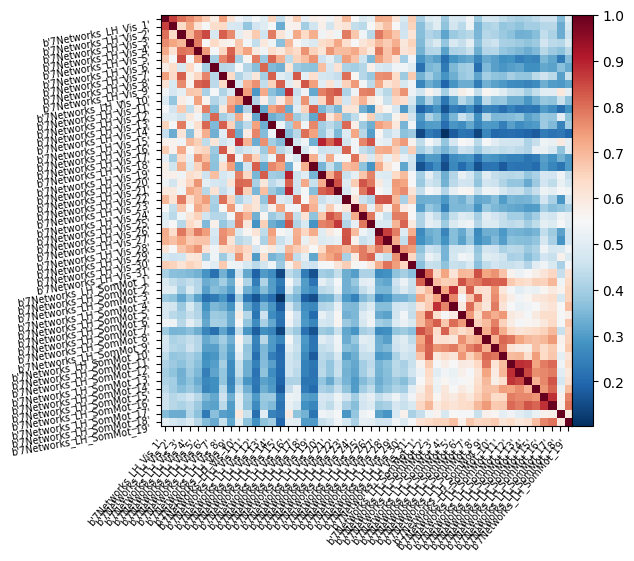

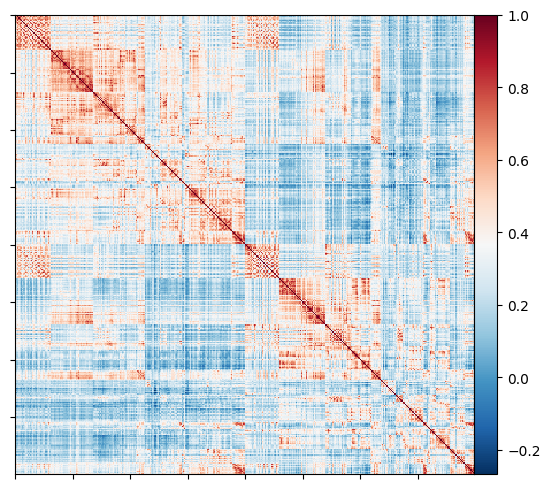

In [23]:
plotting.plot_matrix(mean_[:50,:50],labels = schaefer['labels'][:50])
plotting.show()
plotting.plot_matrix(mean_)


In [20]:
plotting.view_connectome(mean_, coords, edge_threshold = '95%')